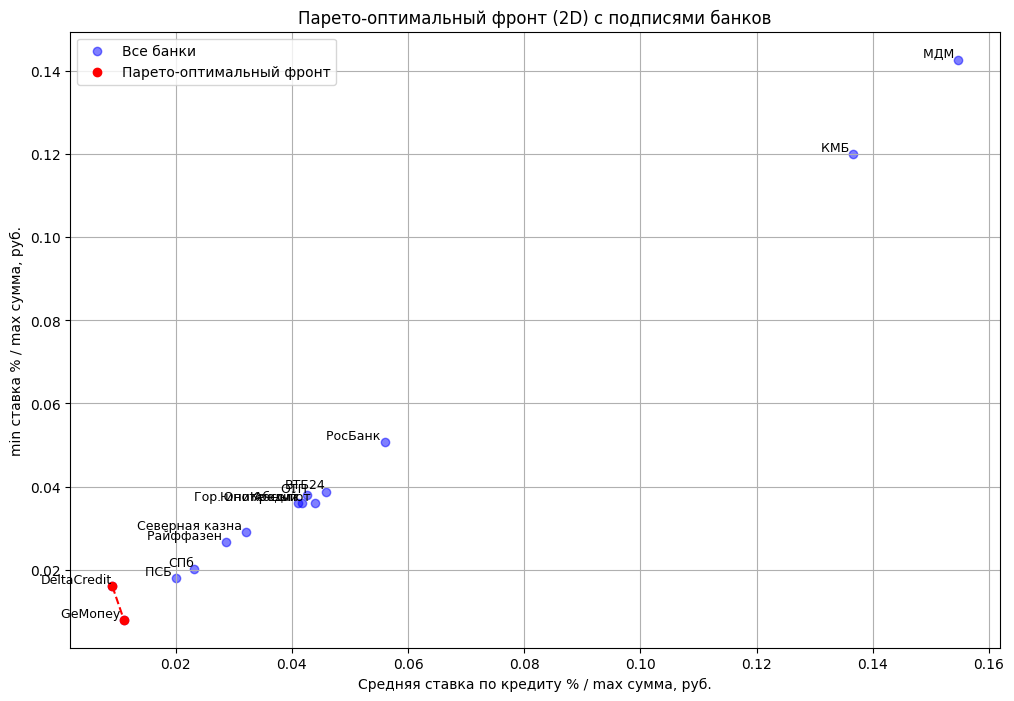

Лексикографически лучший банк: DeltaCredit
Входит ли в Парето-оптимальный фронт: True
Парето-оптимальный фронт (2D):
          БАНК    x_axis  y_axis
4     GеМопеу   0.011050   0.008
5  DeltaCredit  0.009084   0.016


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из Excel
file_path = '../data/Банки.xlsx'
data = pd.read_excel(file_path, sheet_name='Лист1')
data = data.drop(4).reset_index(drop=True) # Удалил Сбербанк, так как он далеко от парето-фронта и сжимает весь график.

# Вычисление новых осей
data['x_axis'] = data['Средняя ставка по кредиту %'] / data['max сумма, руб.']  # Решил отобразить отношением (Ср. Ставка / Макс. Сумма)
data['y_axis'] = data['min ставка %'] / data['max сумма, руб.']                 # Аналогично для второй оси

# Функция для проверки доминирования
def is_dominated_2d(row, df):
    for _, other in df.iterrows():
        if (other['x_axis'] <= row['x_axis'] and other['y_axis'] <= row['y_axis']) and \
           (other['x_axis'] < row['x_axis'] or other['y_axis'] < row['y_axis']):
            return True
    return False

# Построение Парето-оптимального фронта
pareto_front_2d = data[~data.apply(is_dominated_2d, df=data, axis=1)].copy()

# Создание 2D-графика
plt.figure(figsize=(12, 8))

# Все банки
plt.scatter(data['x_axis'], data['y_axis'], color='blue', alpha=0.5, label='Все банки')

# Парето-оптимальный фронт
plt.scatter(pareto_front_2d['x_axis'], pareto_front_2d['y_axis'], color='red', label='Парето-оптимальный фронт')

# Соединяем точки Парето-фронта линиями
pareto_front_2d_sorted = pareto_front_2d.sort_values(by='x_axis')
plt.plot(pareto_front_2d_sorted['x_axis'], pareto_front_2d_sorted['y_axis'], color='red', linestyle='--')

# Добавляем подписи для всех банков
for i, row in data.iterrows():
    plt.text(row['x_axis'], row['y_axis'], row['БАНК'], fontsize=9, ha='right', va='bottom')

# Настройка графика
plt.xlabel('Средняя ставка по кредиту % / max сумма, руб.')
plt.ylabel('min ставка % / max сумма, руб.')
plt.title('Парето-оптимальный фронт (2D) с подписями банков')
plt.legend()
plt.grid(True)

# Показать график
plt.show()

# Определение лексикографически лучшего банка
# Упорядочивание банков по важности критериев: средняя ставка, минимальная ставка, максимальная сумма
data_sorted = data.sort_values(by=['Средняя ставка по кредиту %', 'min ставка %', 'max сумма, руб.'], ascending=[True, True, False])
best_bank = data_sorted.iloc[0]

# Проверка, входит ли лучший банк в Парето-оптимальный фронт
is_best_in_pareto = best_bank['БАНК'] in pareto_front_2d['БАНК'].values

# Вывод результатов
print("Лексикографически лучший банк:", best_bank['БАНК'])
print("Входит ли в Парето-оптимальный фронт:", is_best_in_pareto)

# Вывод Парето-оптимального фронта
print("Парето-оптимальный фронт (2D):")
print(pareto_front_2d[['БАНК', 'x_axis', 'y_axis']])

Итог:
- Убрал сбербанк, который сжимает точки внизу слева, так как он далеко вверху справа.
- Сделал 2 оси отошением: 
$$\frac{\text{Средняя ставка}}{\text{Максимальная сумма}},$$
$$\frac{\text{Минимальная ставка}}{\text{Максимальная сумма}}$$

Оба отношения должны стремиться к минимуму, так как сумма нужна больше, а размер ставок меньше.